# Исследование объявлений о продаже квартир

## План:

1)Изучение общей информации о данных, просмотр корректности заполнения данных
2)Предобработка данных(пропуски, изменение типа данных, отбор нужных данных)
3)Добавление новых столбцов, нужных для использования в дальнейшем:
    1. Цена квадратного метра
    2. День недели, месяц и год публикации объявления
    3. Этаж квартиры: варианты — первый, последний, другой
    4. Соотношение жилой и общей площади, а также отношение площади кухни к общей
4)Исследовательский анализ данных:
    1. Изучение следующих параметров: площадь, цена, число комнат, высота потолков 
    2. Изучение времени продажи квартиры
    3. Удаление выбросов(редких и выделяющихся значений)
    4. Исследовательскйи анализ зависимость цены от площади, числа комнат, удалённости от центра, типа этажа на котором располагается квартира, от даты размещения: дня недели, месяца и года
    5. Изучение цены квадратного метра в различных населенных пунктах
    6. Исследовательский анализ изменения цены на квартиру в зависимости от расстояния до центра, выделение квартиры, находящихся в центре
    7. Исследовательский анализ для квартир, поданных на продажу, на территории центра Санкт-Петербурга
        а) Изучение следующих параметров: площадь, цена, число комнат, высота потолков
        б) Исследовательскйи анализ зависимость цены от площади, числа комнат, удалённости от центра, типа этажа на котором располагается квартира, от даты размещения: дня недели, месяца и года
5)Вывод из исследовательского анализа данных

## Описание данных:

    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
    balсony — число балконов
    ceiling_height — высота потолков (м)
    cityCenters_nearest — расстояние до центра города (м)
    days_exposition — сколько дней было размещено объявление (от публикации до снятия)
    first_day_exposition — дата публикации
    floor — этаж
    floors_total — всего этажей в доме
    is_apartment — апартаменты (булев тип)
    kitchen_area — площадь кухни в квадратных метрах (м²)
    last_price — цена на момент снятия с публикации
    living_area — жилая площадь в квадратных метрах(м²)
    locality_name — название населённого пункта
    open_plan — свободная планировка (булев тип)
    parks_around3000 — число парков в радиусе 3 км
    parks_nearest — расстояние до ближайшего парка (м)
    ponds_around3000 — число водоёмов в радиусе 3 км
    ponds_nearest — расстояние до ближайшего водоёма (м)
    rooms — число комнат
    studio — квартира-студия (булев тип)
    total_area — площадь квартиры в квадратных метрах (м²)
    total_images — число фотографий квартиры в объявлении

# Изучение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Пропуски есть в столбцах: 'ceiling_height', 'floor_total', 'living_area', 'is_apartment', 'kitchen_area', 'balcony'
'locality_name', 'airports_nearest', 'cityCentres_nearest', 'park_around3000', 'parks_nearest', 'ponds_around3000' 'ponds_nearest', 'days_exposition'. Столбцы 'total_images', 'is_apartment', 'balcony', 'airport_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest' не пригодятся. Можно и по этим данным проанализировать стоимость квартиры, но большого смысла в этом нету, эти факторы достаточно побочны и будут только мешаться, с 12 столбцами будет работать намного проще. Дупликаты не найдены. Столбец 'first_day_exposition' имеет тип 'object', нужно будет переделать тип на более удобный с работой с датами. Возможно наличие выбросов.

In [2]:
flat = pd.read_csv('project_2_data.csv', sep='\t')
flat = flat[[
    'last_price', 'total_area', 'first_day_exposition', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
    'kitchen_area', 'locality_name', 'cityCenters_nearest', 'days_exposition'
]]
print(flat.head())
print(flat.shape)
print(flat.info())
print(flat.duplicated().sum())
print(flat[['last_price', 'total_area', 'floor', 'living_area','kitchen_area', 'cityCenters_nearest']].corr())

   last_price  total_area first_day_exposition  rooms  ceiling_height  \
0  13000000.0       108.0  2019-03-07T00:00:00      3            2.70   
1   3350000.0        40.4  2018-12-04T00:00:00      1             NaN   
2   5196000.0        56.0  2015-08-20T00:00:00      2             NaN   
3  64900000.0       159.0  2015-07-24T00:00:00      3             NaN   
4  10000000.0       100.0  2018-06-19T00:00:00      2            3.03   

   floors_total  living_area  floor  kitchen_area    locality_name  \
0          16.0         51.0      8          25.0  Санкт-Петербург   
1          11.0         18.6      1          11.0   посёлок Шушары   
2           5.0         34.3      4           8.3  Санкт-Петербург   
3          14.0          NaN      9           NaN  Санкт-Петербург   
4          14.0         32.0     13          41.0  Санкт-Петербург   

   cityCenters_nearest  days_exposition  
0              16028.0              NaN  
1              18603.0             81.0  
2             

### Вывод

1)В данных существую столбцы, которые на практике не понадобятся(цена квартиры от них практически не зависит, в этом, конечно, можно убедиться, но будет больше проблем с пропусками, чем результатов, результаты скорее всего будут тривиальными). 2)В столбцах существуют пропуски, больше всего в столбце - 'ceiling_height', больше трети данных в этом столбце пропущено. В некоторые из них можно внести значения, которые поддаются логике, например если нету балконов, человек мог просто не заполнить эту строку. 3)Возможно существуют выбросы, следует проверить столбцы на их наличие.

# Предобработка данных

Пропуски возникают либо если пользователь не ввел нужную информацию либо из-за технических сбоев и проблем при получении информации с картографических данных. Сложно заполнить пропуски в столбцах 'living_area' и 'kitchen_area' из-за того, что при вычитании мы только потеряем ещё больше(NaN - число = NaN). Сложно заменить остальные пропущенные значения какими-то определенными значениями, удалять пропуски тоже нельзя, иначе потерям около 40% данных. Для удобства анализа по городам удалим пропуски в столбце 'locality_name' следует изменить тип данных на целочисленный в столбцах 'last_price', 'floors_total', 'cityCentres_nearest', 'days_exposition', такие значения либо имеют смысл в количестве в штуках либо значение числа намного больше по порядку, чем дробные части числа, приведем столбец 'first_dat_expositio' к типу datetime, чтобы можно было работать с датами.

In [3]:
flat.dropna(subset=['locality_name', 'floors_total'], inplace=True)
flat['last_price'] = flat['last_price'].astype('int')
flat['floors_total'] = flat['floors_total'].astype('int')
flat['first_day_exposition'] = pd.to_datetime(flat['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# Добавление столбцов в таблицу

In [4]:
# добавление цены на квадратный метр
def price_metre(row):
    last_price = row[0]
    total_area = row[1]
    return last_price / total_area


flat['price_on_metre'] = flat.apply(price_metre, axis=1)
flat['price_on_metre'] = flat['price_on_metre'].astype('int')
# добавление дня недели, месяца и года публикации
flat['weekday'] = flat['first_day_exposition'].dt.weekday
flat['month'] = flat['first_day_exposition'].dt.month
flat['year'] = flat['first_day_exposition'].dt.year
# добавление этажа квартиры


def floor(row):
    floor_i = row[7]
    floor_n = row[5]
    if (floor_i == floor_n):
        return 'последний'
    elif (floor_i == 1):
        return 'первый'
    else:
        return 'другой'


flat['floor_type'] = flat.apply(floor, axis=1)
# соотношение жилой -> общей и кухни -> общей


def living(row):
    living = row[6]
    total = row[1]
    return living / total


flat['living_on_total'] = flat.apply(living, axis=1)


def kitchen(row):
    kitchen = row[8]
    total = row[1]
    return kitchen / total


flat['kitchen_on_total'] = flat.apply(kitchen, axis=1)

# Исследовательский анализ

## Изучение параметров для квартир в городах

### Анализ 'total_area'

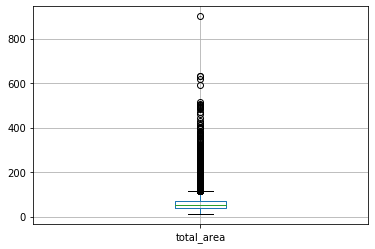

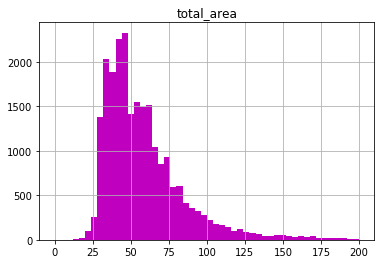

In [5]:
flat.boxplot(column='total_area')
plt.show()
flat = flat[flat['total_area'] < 200]
flat['total_area'].hist(bins=50, range=(0, 200), label='total_area', color='m')
plt.title('total_area')
plt.show()

### Анализ 'last_price'

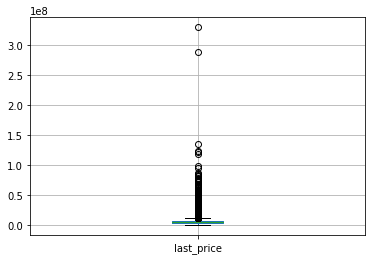

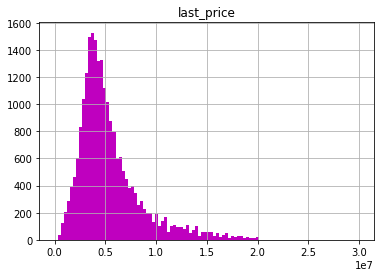

In [6]:
# статистика цены на квартиру
flat.boxplot(column='last_price')
plt.show()
flat = flat[flat['last_price'] < 20000000]
flat['last_price'].hist(bins=100, range=(0, 30000000), label='last_price', color='m')
plt.title('last_price')
plt.show()

### Анализ 'rooms'

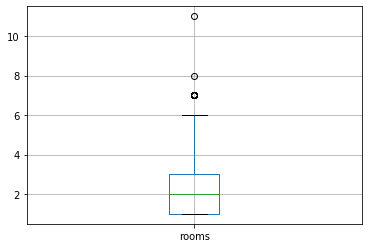

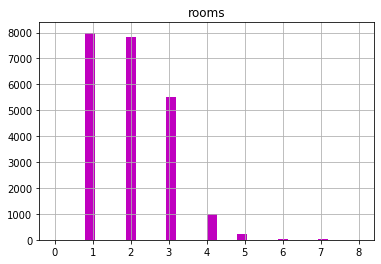

In [7]:
# статистика кол-ва комнат
flat = flat[flat['rooms'] != 0]
flat.boxplot(column='rooms')
plt.show()
flat = flat[flat['rooms'] <= 10]
flat['rooms'].hist(bins=30, range=(0, 8), label='rooms', color='m')
plt.title('rooms')
plt.show()

### Анализ 'ceiling_height'

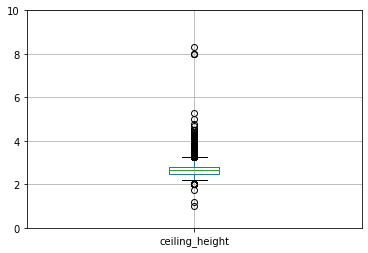

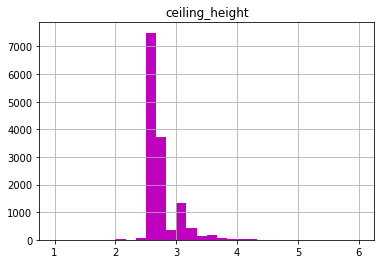

In [8]:
# статистика высоты потолков
flat.boxplot(column='ceiling_height')
plt.ylim(0, 10)
plt.show()
flat = flat[flat['ceiling_height'] < 5]
flat['ceiling_height'].hist(bins=30, range=(1, 6), label='ceiling', color='m')
plt.title('ceiling_height')
plt.show()

### Итого гистограммы параметров

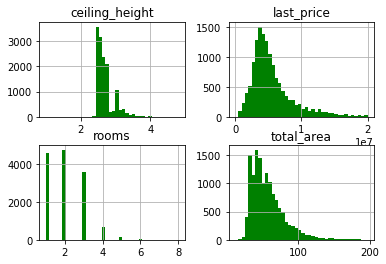

In [9]:
columns = [['total_area', 'last_price', 'rooms', 'ceiling_height']]
for column in columns:
    flat[column].hist(bins=40, color='g')

Распределения, после удаления выбросов, параметров можно видеть в выводе, все распределения Ньютона поддаются Пуассоновской модели, поэтому отражают реальные числа, выбросов, кроме убранных не обнаружено.

### Анализ времени продажи квартир

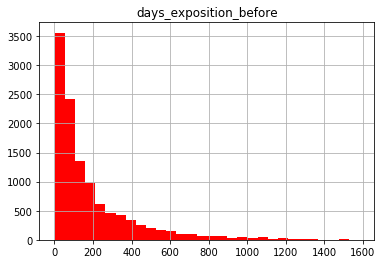

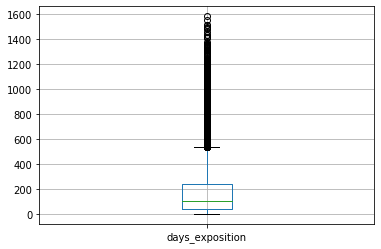

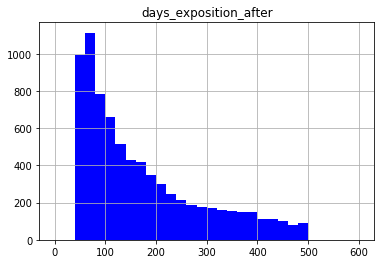

count    7651.000000
mean      169.555222
std       117.230749
min        45.000000
25%        74.000000
50%       130.000000
75%       234.500000
max       499.000000
Name: days_exposition, dtype: float64
median = 130.0


In [10]:
flat['days_exposition'].hist(bins=30, color='r')
plt.title('days_exposition_before')
plt.show()
flat.boxplot(column='days_exposition')
plt.show()
flat_time = flat[flat['days_exposition'] < 500]
flat_time = flat_time[flat_time['days_exposition'] > 45]
flat_time['days_exposition'].hist(bins=30, range=(0, 600), color='b')
plt.title('days_exposition_after')
plt.show()
print(flat_time['days_exposition'].describe())
print('median = ', end='')
print(flat_time['days_exposition'].median())

Из первой гистограммы видно, что распределение не Пуассоновское, построив 'ящик с усами' легко убедиться, что значение времени продажи больше 500 и меньше 45 - выбросы, то есть продавать квартиру больше 500 дней - очень долго, а меньше 45 - слишком быстро, убрав такие выбросы получим гистограмму снизу более похожую на Пуассоновскую. Так избавившись от явно неправдоподобных значений среднееквадратичное отклонение стало меньше среднего и оно ближе к медиане точка экстремума также сместилась вправо.

## Анализ зависимости цены от различных параметров

### Корреляции данных

In [11]:
print(flat[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr())

                     last_price  total_area     rooms  cityCenters_nearest
last_price             1.000000    0.778183  0.503735            -0.356817
total_area             0.778183    1.000000  0.796095            -0.206568
rooms                  0.503735    0.796095  1.000000            -0.144286
cityCenters_nearest   -0.356817   -0.206568 -0.144286             1.000000


### Площадь квартиры

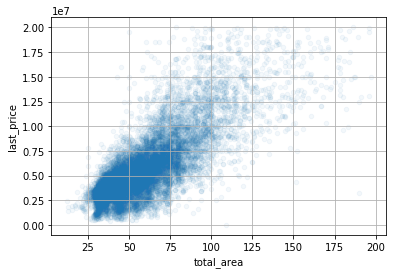

In [12]:
# зависимость цены от площади квартиры
flat.plot(x='total_area', y='last_price', kind='scatter', alpha=0.05, grid=True, legend=True)
plt.show()

### Число комнат в квартире

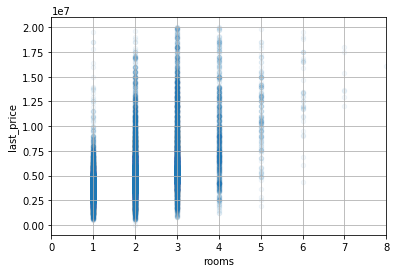

In [13]:
# зависимость цены от числа комнат в квартире
flat.plot(x='rooms', y='last_price', kind='scatter', alpha=0.05, xlim=(0, 8), grid=True, legend=True)
plt.show()

### Расстояние до центра

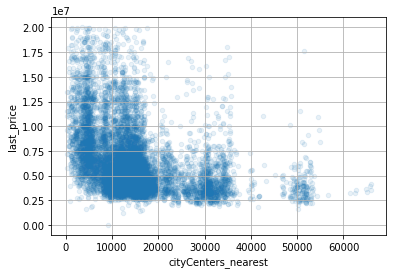

In [14]:
# зависимость цены от удаленности от центра
flat.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.1, sharex=False, grid=True, legend=True)
plt.show()

### Этаж расположения квартиры

In [15]:
# зависимость цены от этажа
print(flat[flat['floor_type'] == 'первый']['last_price'].mean())
print(flat[flat['floor_type'] == 'другой']['last_price'].mean())
print(flat[flat['floor_type'] == 'последний']['last_price'].mean())

4558960.426303855
5853078.257476728
5362785.7588116815


### Время и дата выкладывания объявления о продаже квартиры

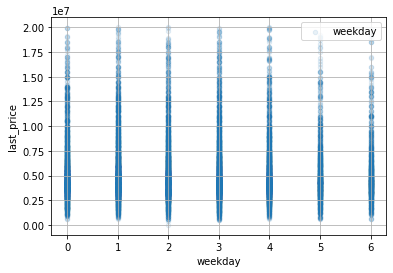

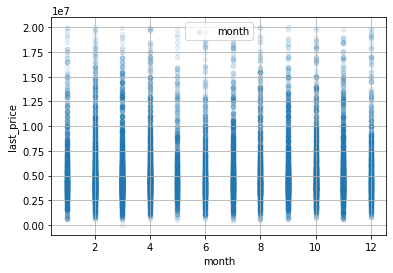

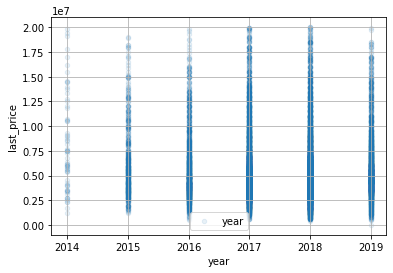

In [16]:
# зависимость цены от дня недели, месяца и года
flat.plot(x='weekday', y='last_price', kind='scatter', alpha=0.1, label='weekday', grid=True)
plt.show()
flat.plot(x='month', y='last_price', kind='scatter', alpha=0.1, label='month', grid=True)
plt.show()
flat.plot(x='year', y='last_price', kind='scatter', alpha=0.1, label='year', grid=True)
plt.show()

Цена достаточно хорошо коррелирует от площади квартиры, поэтому цена на квартиру напрямую зависит от её площади. Цена зависит и от количества комнат, но зависимость здесь скорее косвенная через площадь квартиры, поскольку размер комнат не уточняется, но в среднем при увеличении числа комнат цена естественно увеличивается. Цена на квартиру зависит от расстояния до центра города странным образом, думаю есть критическое значение расстояния, где цена на квартиру начинает линейно зависеть от расстояния до центра с большим углом наклона. Цена не зависит от дня недели или месяца публикации объявления. В 2017 году цены на квартиру были самые высокие в связи с экономическим ростом цен на жилую недвижимость.

### Анализ цены от города

In [17]:
locality_group = flat.pivot_table(index='locality_name', values='price_on_metre', aggfunc=['count', 'mean'])
locality_group.columns = ['count', 'mean']
locality_group_exposition = locality_group.sort_values(by='count', ascending=False)
locality_group_exposition = locality_group_exposition.head(10)
print(locality_group_exposition)
locality_group_price = locality_group.sort_values(by='mean', ascending=False)
# замечены единичные случаи они почти не поддаются анализу, уберем значения меньшие 10
locality_group_price = locality_group_price[locality_group_price['count'] >= 10]
print(locality_group_price.head(10))
print(locality_group_price.tail(10))

                   count           mean
locality_name                          
Санкт-Петербург     9516  109273.704813
Всеволожск           268   67247.417910
Пушкин               228  101859.298246
посёлок Шушары       215   79244.409302
Колпино              203   75938.098522
посёлок Мурино       196   87309.551020
Гатчина              148   70024.513514
Петергоф             142   85030.823944
посёлок Парголово    137   90900.927007
Сестрорецк           128  101664.773438
                   count           mean
locality_name                          
Санкт-Петербург     9516  109273.704813
Кудрово               70  104879.171429
Пушкин               228  101859.298246
Сестрорецк           128  101664.773438
Зеленогорск           18  101319.666667
Мурино                13   97989.538462
посёлок Стрельна      26   91005.346154
посёлок Парголово    137   90900.927007
деревня Кудрово      118   90567.457627
Павловск              23   87592.217391
                                   count

Заведомо больше объявлений в Санкт-Петербурге, далее - в поселках, ну очевидно в городе федерального уровня население больше. В Зеленогорске, Санкт-Петербурге, Сестрорецке и Пушкине самые дорогие квартиры, цена на кв. метр заваливает за 100000 руб. поразительно дешевые квартиры в Бокситогорске, Сланцах, Пикалево и Назии где цена на кв. метр меньше 30000 руб.

### Анализ цены в зависимости от расстояния до центра в г. Санкт-Петербург

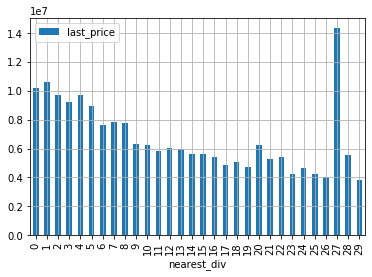

In [18]:
flat_spb = flat[flat['locality_name'] == 'Санкт-Петербург']
city_centres = flat_spb[['cityCenters_nearest', 'last_price']]
city_centres = city_centres.dropna()
city_centres = city_centres.astype('int')


def div(row):
    return int(row[0] / 1000)


city_centres['nearest_div'] = city_centres.apply(div, axis=1)
city_centres_div_mean = city_centres.pivot_table(index='nearest_div', values='last_price')
city_centres_div_mean.plot(y='last_price', kind='bar', grid=True)
plt.show()
# начиная где-то с 6000 км цена начинается эффект возрастания цен, что и калибрует центральную зону

### Анализ показателей квартир в центр СПБ

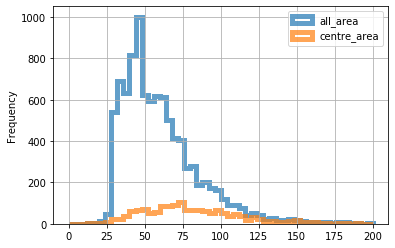

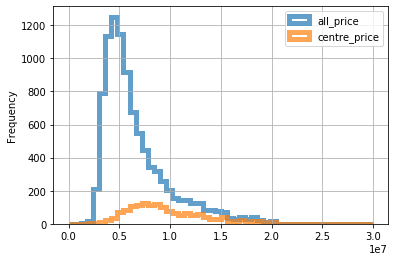

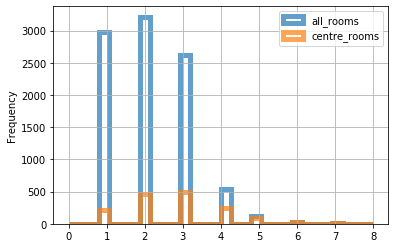

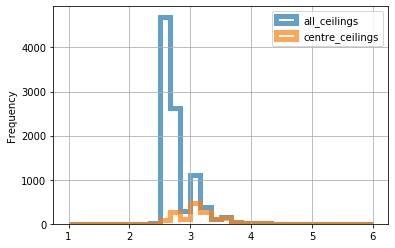

In [19]:
# статистика площади, цены, числа комнат и высоты потолков для Петербурга в целом

# статистика площади квартиры
ax1 = flat_spb.plot(
    kind='hist', y='total_area', histtype='step', range=(0, 200), bins=50, linewidth=5, label='all_area', alpha=0.7)
# статистика цены на квартиру
ax2 = flat_spb.plot(
    kind='hist', y='last_price', histtype='step', range=(0, 30000000), bins=50, linewidth=5, label='all_price', alpha=0.7)
# статистика кол-ва комнат
ax3 = flat_spb.plot(
    kind='hist', y='rooms', histtype='step', range=(0, 8), bins=30, linewidth=5, label='all_rooms',  alpha=0.7)
# статистика высоты потолков
ax4 = flat_spb.plot(
    kind='hist', y='ceiling_height', histtype='step', range=(1, 6), bins=30, linewidth=5, label='all_ceilings', alpha=0.7)
print()
flat_spb_centre = flat_spb[flat_spb['cityCenters_nearest'] < 6000]
print()
# статистика площади, цены, числа комнат и высоты потолков для центра Петербурга

# статистика площади квартиры
flat_spb_centre.plot(
    kind='hist', y='total_area', histtype='step', range=(0, 200), bins=50, linewidth=5, ax=ax1,
    label='centre_area', alpha=0.7, grid=True, legend=True)
flat_spb_centre.plot(
    kind='hist', y='last_price', histtype='step', range=(0, 30000000), bins=50, linewidth=5, ax=ax2,
    label='centre_price', alpha=0.7, grid=True, legend=True)
flat_spb_centre.plot(
    kind='hist', y='rooms', histtype='step', range=(0, 8), bins=30, linewidth=5, ax=ax3, label='centre_rooms',
    alpha=0.7, grid=True, legend=True)
flat_spb_centre.plot(
    kind='hist', y='ceiling_height', histtype='step', range=(1, 6), bins=30, linewidth=5, ax=ax4,
    label='centre_ceilings', alpha=0.7, grid=True, legend=True)
plt.show()

В центре города в среднем больше площадь, больше цены, больше комнат и выше потолки в относительной величине, чем по всему городу в целом, поскольку экстремумы(максимумы) гистограмм центра города стоят правее, чем всего города в целом

### Cравнение зависимостей цены для всего Санкт-Петербурга и для центра Санкт-Петербурга от различных параметров

#### Корелляции данных

In [20]:
print('all')
print(flat_spb[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr())
print()
print('centre')
print(flat_spb_centre[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr())

all
                     last_price  total_area     rooms  cityCenters_nearest
last_price             1.000000    0.823058  0.544534            -0.413005
total_area             0.823058    1.000000  0.795003            -0.322817
rooms                  0.544534    0.795003  1.000000            -0.246804
cityCenters_nearest   -0.413005   -0.322817 -0.246804             1.000000

centre
                     last_price  total_area     rooms  cityCenters_nearest
last_price             1.000000    0.688143  0.456864            -0.110052
total_area             0.688143    1.000000  0.800610            -0.120537
rooms                  0.456864    0.800610  1.000000            -0.117644
cityCenters_nearest   -0.110052   -0.120537 -0.117644             1.000000


#### Площадь квартиры

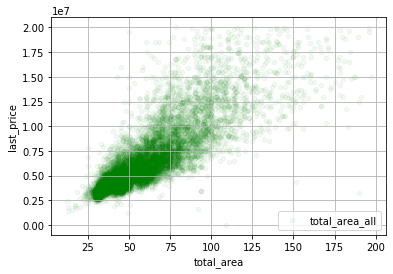

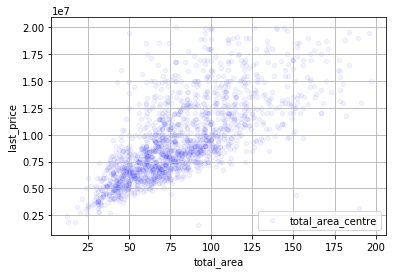

In [21]:
# зависимость цены от площади квартиры(весь город)
flat_spb.plot(
    x='total_area', y='last_price', kind='scatter', alpha=0.05, grid=True, legend=True, color='g', label='total_area_all')
plt.show()
# зависимость цены от площади квартиры(центр)
flat_spb_centre.plot(
    x='total_area', y='last_price', kind='scatter', alpha=0.05, grid=True, legend=True, label='total_area_centre', color='b')
plt.show()

#### Число комнат в квартире

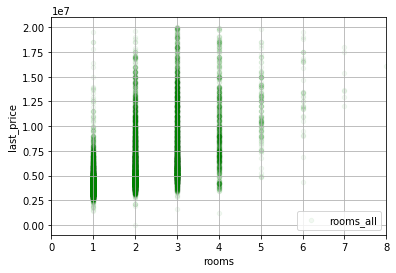

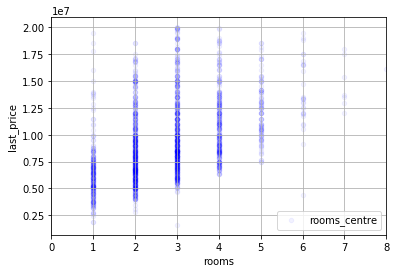

In [22]:
# зависимость цены от числа комнат(весь город)
flat_spb.plot(x='rooms', y='last_price', kind='scatter', xlim=(0, 8), alpha=0.05, grid=True, legend=True,
              label='rooms_all', color='g')
plt.show()
# зависимость цены от числа комнат(центр)
flat_spb_centre.plot(x='rooms', y='last_price', kind='scatter', xlim=(0, 8), alpha=0.05, grid=True, legend=True,
                     label='rooms_centre', color='b')
plt.show()

#### Удаленность квартиры от центра

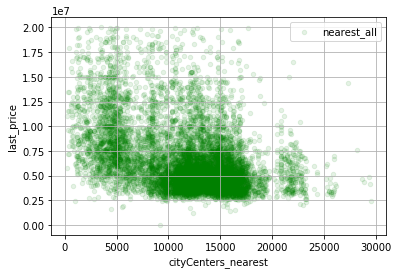

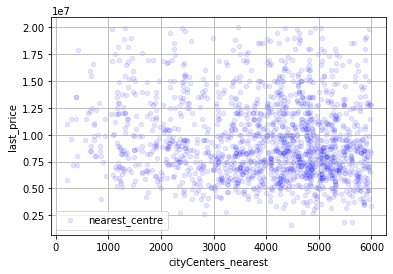

In [23]:
# зависимость цены от удаленности от центра(весь город)
flat_spb.plot(
    x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.1, grid=True, label='nearest_all', legend=True, color='g')
plt.show()
# зависимость цены от удаленности от центра(центр)
flat_spb_centre.plot(
    x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.1, legend=True, grid=True,label='nearest_centre',
    color='b')
plt.show()

#### Этаж нахождения квартиры

In [24]:
# зависимость цены от этажа(весь город)
print('all')
print(flat_spb[flat_spb['floor_type'] == 'первый']['last_price'].mean())
print(flat_spb[flat_spb['floor_type'] == 'другой']['last_price'].mean())
print(flat_spb[flat_spb['floor_type'] == 'последний']['last_price'].mean())
# зависимость цены от этажа(центр)
print('centre')
print(flat_spb_centre[flat_spb_centre['floor_type'] == 'первый']['last_price'].mean())
print(flat_spb_centre[flat_spb_centre['floor_type'] == 'другой']['last_price'].mean())
print(flat_spb_centre[flat_spb_centre['floor_type'] == 'последний']['last_price'].mean())

all
5516084.485493231
6657990.7478177855
6790549.206956522
centre
7511472.867021277
9843702.304015296
9625342.633116882


#### Время и дата выкладывания объявления о продаже квартиры

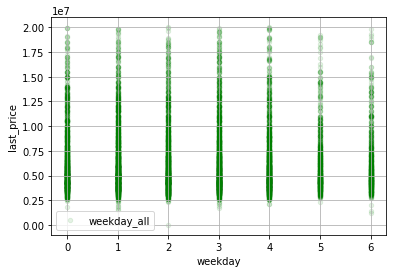

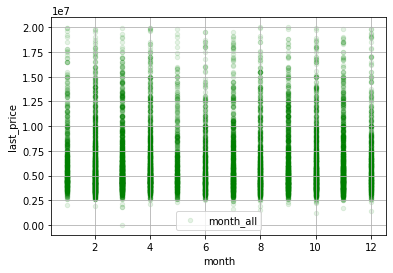

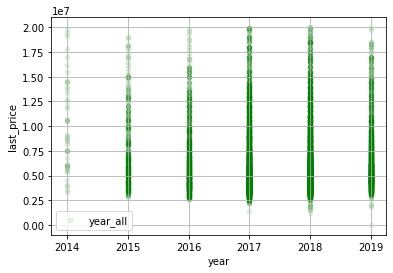

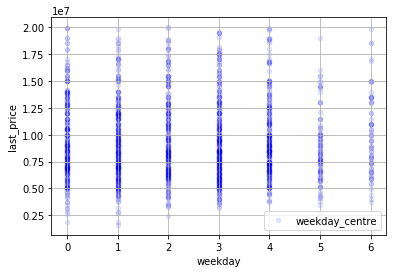

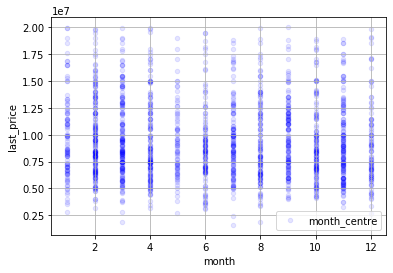

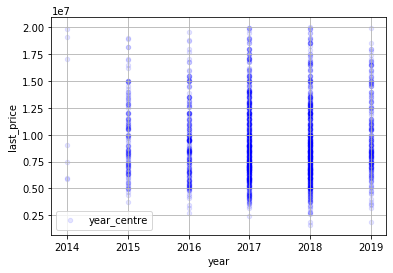

In [25]:
# зависимость цены от дня недели, месяца и года(весь город)
flat_spb.plot(x='weekday', y='last_price', kind='scatter', alpha=0.1, label='weekday_all', grid=True, color='g')
plt.show()
flat_spb.plot(x='month', y='last_price', kind='scatter', alpha=0.1, label='month_all', grid=True, color='g')
plt.show()
flat_spb.plot(x='year', y='last_price', kind='scatter', alpha=0.1, label='year_all', grid=True, color='g')
plt.show()
# зависимость цены от дня недели, месяца и года(центр)
flat_spb_centre.plot( x='weekday', y='last_price', kind='scatter', alpha=0.1, label='weekday_centre', grid=True, color='b')
plt.show()
flat_spb_centre.plot(x='month', y='last_price', kind='scatter', alpha=0.1, label='month_centre', grid=True, color='b')
plt.show()
flat_spb_centre.plot(x='year', y='last_price', kind='scatter', alpha=0.1, label='year_centre', grid=True, color='b')
plt.show()

Зависимость цены от различных параметров в центре сохраняет поведение, по-прежнему цена независит от месяца и дня недели выкладывания объявления, в 2017 году квартиры проданы по самой дорогой в среднем цене и площадь линейно растет с увеличением цены квартиры, цены по-прежнему самые низкие на первый этаж

### Шаг 5. Общий вывод

   В среднем квартиры имеют площадь 45 квадратных метров, стоят 5.2 млн. руб. имеют 1 - 2 реже 3 комнаты и высоту потолков - 2.6 метра. Продажи в среднем занимают 3 - 4 месяца, с публикации объявления. Самые дешевые квартиры на первом этаже их цена в среднем - 4.5 млн. руб, на остальных около 5.7 млн. руб. .Цена квартиры практически линейно зависит от её площади, грубо говоря, можно с достаточно большой точностью ввести цену на квадратный метр, которая строго будет определять цену по площади квартиры; при увеличении числа комнат цена увеличивается, но явно не линейно, поскольку этот фактор не влияет напрямую на цену, а лишь косвенно в качестве суммы площадей каждой из них, то есть параметр косвенный; при приближении к центру города стоимость квартиры в среднем также увеличивается, но с очень сложной зависимостью; от дня недели и месяца цена не зависит; в 2017 году был пик стоимости недвижимости, это связано с экономическими циклами цен на недвижимость, то есть рыночная цена была в 2017 году самой большой. Количество объявлений самое большое в Санкт-Петербурге, что неудивительно в связи с его населением; Самые дорогие квартиры - в Зеленогорске, Санкт-Петербурге, Сестрорецке и Пушкине, где цена на квадратный местр переваливает за 100000 руб.; Самые дешевые квартиры - в Бокситогорске, Сланцах, Пикалёво и пгт. Назии, где цена на квадратный метр менее 30000 руб.. Зависимость цены от расстояния до центра города Санкт-Петербурга приведена на графике выше, есть зона в которой наблюдается другой коэффициент наклона графика(более большой), это и есть территория центра Санкт-Петербурга. На территории Санкт-Петербурга средняя площадь квартиры - 50 квадратных метров, цена - 4.7 млн. руб., 1 - 2 реже 3 комнаты и высота потолков - 2.6 метра. В территории центра Санкт-Петербурга площадь в среднем составляет 65 квадратных метров, стоимость квартир - 7.5 млн. руб., количество комнат 2 - 3 реже 1 или 4, высота потолков - 3.1 метр; по-прежнему на первом этаже самые дешевые квартиры; то есть в центре города квартиры комфортнее, больше и дороже, чем в среднем по городу. Зависимость цены от различных параметров в центре сохраняет поведение, по-прежнему цена независит от месяца и дня недели выкладывания объявления, в 2017 году квартиры проданы по самой дорогой в среднем цене и площадь линейно растет с увеличением цены квартиры.